In [171]:
import pandas as pd
import numpy as np

In [172]:
data = pd.read_csv('product_prices.csv', encoding='latin1')
data.head(40)

,Product_names,Prices,Sales,Promotion,Sold_out
0,English Pear & Sweet Pea Cologne 9ml,890ß,670ß,big sale,35
1,Black Opium Eau De Parfum 3ml,590ß,359ß,big sale,125
2,YSL Myslf edp 3 ml,790ß,359ß,big sale,42
3,Sauvage Eau De Toilette 1 ml,200ß,150ß,big sale,414
4,Sauvage Eau de Parfum 1ml,200ß,150ß,big sale,301
5,Miss Dior EDP 5ml,690ß,579ß,big sale,17
6,For Her Eau de Toilette 7.5ml (No Box),890ß,615ß,big sale,146
7,Libre Eau de Parfum 10 ml (Tester Box),1300ß,939ß,big sale,204
8,Libre Eau De Parfum 7.5ml,990ß,729ß,flash sale,293
9,The Yulong Eau de Toilette 7.5 ml,1590ß,990ß,flash sale,44


In [173]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_names  40 non-null     object
 1   Prices         40 non-null     object
 2   Sales          40 non-null     object
 3   Promotion      40 non-null     object
 4   Sold_out       40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB
None


In [174]:
print(data.describe())

                                            Product_names Prices Sales  \
count                                                  40     40    40   
unique                                                 39     23    32   
top     Miss Dior Blooming Bouquet Gift Set (2 items i...   790ß  150ß   
freq                                                    2      6     3   

       Promotion Sold_out  
count         40       40  
unique         3       38  
top     big sale       35  
freq          26        2  


Clean data เพราะในข้อมูลจะมีอัขระแปลกๆ อยู่ ก่อนจะเอาไปวิเคราะห์ต้องจัดการกับอัขระแปลกๆนี้ด้วย รวมถึงข้อมูลที่หายไป
- ลบ ß และ , ออก
- แทนที่ - ด้วย NaN

In [175]:
# ฟังก์ชันในการทำความสะอาดข้อมูลสำหรับคอลัมน์ Prices, Sales, และ Sold_out
def clean_value(value):
    if isinstance(value, str):
        # ลบตัวอักษร ß, โคลอน และคอมม่า และแทนที่ '-' ด้วย NaN
        if value == '-':
            return np.nan
        cleaned_value = value.replace('ß', '').replace(':', '').replace(',', '').strip()
        return float(cleaned_value) if cleaned_value else np.nan
    return value

# ใช้ฟังก์ชันเพื่อทำความสะอาดคอลัมน์ Prices, Sales, และ Sold_out
data['Prices'] = data['Prices'].apply(clean_value)
data['Sales'] = data['Sales'].apply(clean_value)
data['Sold_out'] = data['Sold_out'].apply(clean_value)

# ฟังก์ชันในการทำความสะอาด Promotion
def clean_promotion(value):
    if isinstance(value, str):
        return np.nan if value == '-' else value
    return value

# ใช้ฟังก์ชันทำความสะอาด Promotion
data['Promotion'] = data['Promotion'].apply(clean_promotion)

# แสดงข้อมูลหลังจากทำความสะอาด
print(data.isnull().sum())
data.head(40)

Product_names    0
Prices           0
Sales            1
Promotion        1
Sold_out         0
dtype: int64


,Product_names,Prices,Sales,Promotion,Sold_out
0,English Pear & Sweet Pea Cologne 9ml,890.0,670.0,big sale,35.0
1,Black Opium Eau De Parfum 3ml,590.0,359.0,big sale,125.0
2,YSL Myslf edp 3 ml,790.0,359.0,big sale,42.0
3,Sauvage Eau De Toilette 1 ml,200.0,150.0,big sale,414.0
4,Sauvage Eau de Parfum 1ml,200.0,150.0,big sale,301.0
5,Miss Dior EDP 5ml,690.0,579.0,big sale,17.0
6,For Her Eau de Toilette 7.5ml (No Box),890.0,615.0,big sale,146.0
7,Libre Eau de Parfum 10 ml (Tester Box),1300.0,939.0,big sale,204.0
8,Libre Eau De Parfum 7.5ml,990.0,729.0,flash sale,293.0
9,The Yulong Eau de Toilette 7.5 ml,1590.0,990.0,flash sale,44.0


ในส่วนนี้เราจะจัดการกับค่าที่หายไปโดยที่


    1. แทนค่า NaN ด้วย ค่าเฉลี่ย ในส่วนของ Sales
    2. แทนค่า NaN เป็น 0 ในส่วนของ Sold_out
    3. แทนค่า NaN เป็น No Promotion ในส่วนของ Promotion
แปลงข้อมูล จากข้อมูล object เป็น float

In [176]:
# การจัดการกับค่าที่หายไป (ตัวอย่างการแทนที่ค่าที่หายไปด้วยค่าเฉลี่ย)
data['Prices'].fillna(data['Prices'].mean(), inplace=True)
data['Sales'].fillna(data['Sales'].mean(), inplace=True)
data['Sold_out'].fillna(0, inplace=True)  # แทนที่ NaN ด้วย 0 สำหรับ Sold_out
data['Promotion'].fillna('No Promotion', inplace=True)  # หรือใช้วิธีอื่นตามความเหมาะสม

# แปลงประเภทข้อมูล
data['Prices'] = data['Prices'].astype(float)
data['Sales'] = data['Sales'].astype(float)
data['Sold_out'] = data['Sold_out'].astype(int)

# เปลี่ยนทศนิยมเป็น 2 ตำแหน่ง
data['Prices'] = data['Prices'].round(2)
data['Sales'] = data['Sales'].round(2)
print(data.info())
data.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_names  40 non-null     object 
 1   Prices         40 non-null     float64
 2   Sales          40 non-null     float64
 3   Promotion      40 non-null     object 
 4   Sold_out       40 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.7+ KB
None


C:\Temp\ipykernel_2832\1656242658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prices'].fillna(data['Prices'].mean(), inplace=True)
C:\Temp\ipykernel_2832\1656242658.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,Product_names,Prices,Sales,Promotion,Sold_out
0,English Pear & Sweet Pea Cologne 9ml,890.0,670.00,big sale,35
1,Black Opium Eau De Parfum 3ml,590.0,359.00,big sale,125
2,YSL Myslf edp 3 ml,790.0,359.00,big sale,42
3,Sauvage Eau De Toilette 1 ml,200.0,150.00,big sale,414
4,Sauvage Eau de Parfum 1ml,200.0,150.00,big sale,301
5,Miss Dior EDP 5ml,690.0,579.00,big sale,17
6,For Her Eau de Toilette 7.5ml (No Box),890.0,615.00,big sale,146
7,Libre Eau de Parfum 10 ml (Tester Box),1300.0,939.00,big sale,204
8,Libre Eau De Parfum 7.5ml,990.0,729.00,flash sale,293
9,The Yulong Eau de Toilette 7.5 ml,1590.0,990.00,flash sale,44


In [177]:
# แสดงข้อมูลสรุป
print(data.describe())
print('-----------------------------------------------')

# แสดงข้อมูลที่เป็นค่าที่ซ้ำกันในแต่ละคอลัมน์
print(data['Promotion'].value_counts())
print('-----------------------------------------------')

# แสดงข้อมูลที่ขาดหายไป
print(data.isnull().sum())

            Prices        Sales     Sold_out
count    40.000000    40.000000    40.000000
mean   1353.875000   817.307750   326.000000
std    1418.069511   816.393575   651.999764
min     175.000000   143.000000     6.000000
25%     665.000000   359.000000    51.500000
50%     890.000000   642.500000   125.500000
75%    1500.000000   931.500000   282.500000
max    6600.000000  3990.000000  3917.000000
-----------------------------------------------
Promotion
big sale        26
flash sale      13
No Promotion     1
Name: count, dtype: int64
-----------------------------------------------
Product_names    0
Prices           0
Sales            0
Promotion        0
Sold_out         0
dtype: int64


In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

แสดงความสัมพันธ์ระหว่างราคาปกติและยอดขาย

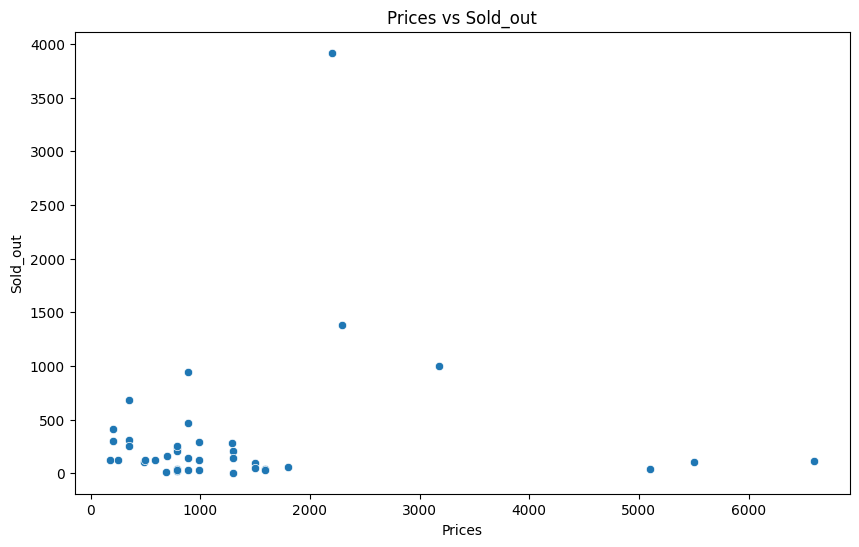

In [179]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Prices', y='Sold_out', data=data)
plt.title('Prices vs Sold_out')
plt.xlabel('Prices')
plt.ylabel('Sold_out')
plt.show()

แสดงความสัมพันธ์ระหว่างราคาที่ลดและยอดขาย

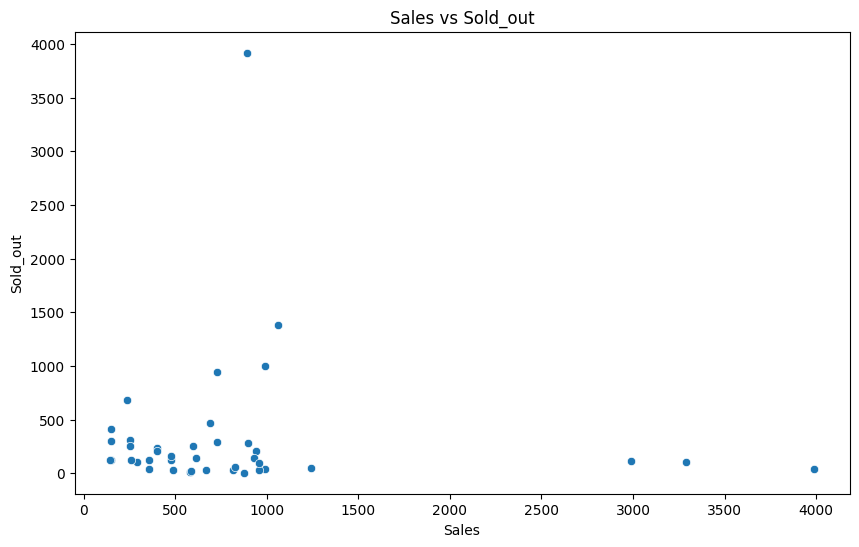

In [180]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Sold_out', data=data)
plt.title('Sales vs Sold_out')
plt.xlabel('Sales')
plt.ylabel('Sold_out')
plt.show()

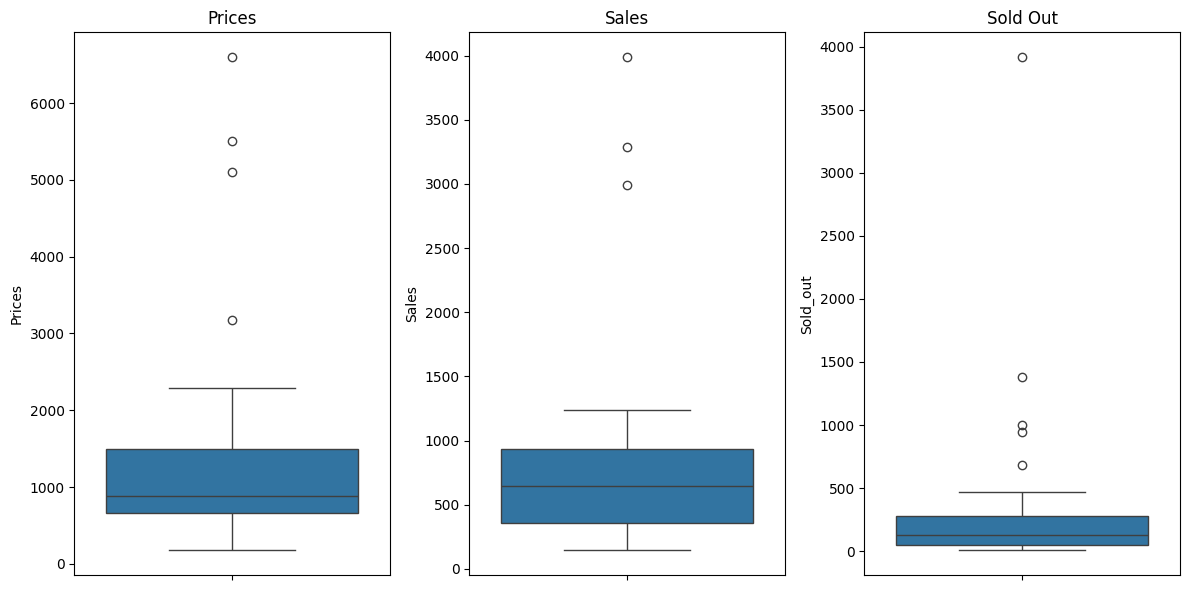

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))


plt.subplot(1, 3, 1)
sns.boxplot(data['Prices'])
plt.title('Prices')

plt.subplot(1, 3, 2)
sns.boxplot(data['Sales'])
plt.title('Sales')

plt.subplot(1, 3, 3)
sns.boxplot(data['Sold_out'])
plt.title('Sold Out')

plt.tight_layout()
plt.show()

In [182]:
# ฟังก์ชันปรับค่า outliers ด้วย IQR
def adjust_outliers(data, column):
    # คำนวณ Q1 (ค่ามัธยฐานล่าง) และ Q3 (ค่ามัธยฐานบน)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # ค่าขอบเขตล่างและบน
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # ปรับค่า outliers ให้อยู่ในขอบเขต
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

# ปรับ outliers สำหรับคอลัมน์ที่ต้องการ
data = adjust_outliers(data, 'Prices')
data = adjust_outliers(data, 'Sales')
data = adjust_outliers(data, 'Sold_out')
print(data.describe())

            Prices       Sales    Sold_out
count    40.000000    40.00000   40.000000
mean   1119.625000   694.82650  206.450000
std     750.644926   433.60295  195.597435
min     175.000000   143.00000    6.000000
25%     665.000000   359.00000   51.500000
50%     890.000000   642.50000  125.500000
75%    1500.000000   931.50000  282.500000
max    2752.500000  1790.25000  629.000000


พยากรณ์

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

สร้าง Feature Engineering ใหม่

In [184]:
# One-Hot Encoding สำหรับ Promotion
data = pd.get_dummies(data, columns=['Promotion'], drop_first=True)
data.head()

,Product_names,Prices,Sales,Sold_out,Promotion_big sale,Promotion_flash sale
0,English Pear & Sweet Pea Cologne 9ml,890.0,670.0,35.0,True,False
1,Black Opium Eau De Parfum 3ml,590.0,359.0,125.0,True,False
2,YSL Myslf edp 3 ml,790.0,359.0,42.0,True,False
3,Sauvage Eau De Toilette 1 ml,200.0,150.0,414.0,True,False
4,Sauvage Eau de Parfum 1ml,200.0,150.0,301.0,True,False


In [191]:
# กำหนด Features และ Target
X = data[['Prices', 'Sales', 'Promotion_flash sale', 'Promotion_big sale']]
y = data['Sold_out']  # เป้าหมายคือยอดขาย (sold_out)

# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Gradient Boosting
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# ทำนายข้อมูลทดสอบ
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"ค่า R^2 ของโมเดล: {r2}")

ค่า R^2 ของโมเดล: 0.40314143118661483


In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# กำหนด Features และ Target
X = data[['Prices', 'Sales', 'Promotion_flash sale', 'Promotion_big sale']]
y = data['Sold_out']  # เป้าหมายคือยอดขาย (sold_out)

# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Gradient Boosting
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# ทำนายข้อมูลทดสอบ
y_pred = model.predict(X_test)

# คำนวณค่า R^2
r2 = r2_score(y_test, y_pred)
print(f"ค่า R^2 ของโมเดล: {r2}")

# ทำนายยอดขายในอนาคต (ใช้ข้อมูล X ใหม่สำหรับพยากรณ์)

# ตรวจสอบให้แน่ใจว่ามีฟีเจอร์เดียวกันกับข้อมูลที่ใช้ฝึก
# นำฟีเจอร์ที่ขาดไปใน future_data มาจาก X_train
missing_cols = set(X.columns) - set(data.columns)
for col in missing_cols:
    data[col] = 0

# ตรวจสอบฟีเจอร์ใน future_data
future_data = data[X.columns]  # ทำให้แน่ใจว่าฟีเจอร์ตรงกัน

# ทำนายยอดขายในอนาคต
future_sales_pred = model.predict(future_data)

# รวมผลลัพธ์การพยากรณ์กับข้อมูลปัจจุบัน
results = pd.DataFrame({
    'Product_names': data['Product_names'],  # ชื่อสินค้า
    'Current_Sold_out': data['Sold_out'],   # จำนวนที่ขายได้ปัจจุบัน
    'Forecasted_Sold_out': future_sales_pred      # จำนวนที่ขายได้ในอนาคต
})

print("ผลลัพธ์การพยากรณ์ยอดขายในอนาคต:")
print(results)

ค่า R^2 ของโมเดล: 0.3566184646067295
ผลลัพธ์การพยากรณ์ยอดขายในอนาคต:
                                        Product_names  Current_Sold_out  \
0                English Pear & Sweet Pea Cologne 9ml              35.0   
1                       Black Opium Eau De Parfum 3ml             125.0   
2                                  YSL Myslf edp 3 ml              42.0   
3                        Sauvage Eau De Toilette 1 ml             414.0   
4                           Sauvage Eau de Parfum 1ml             301.0   
5                                   Miss Dior EDP 5ml              17.0   
6              For Her Eau de Toilette 7.5ml (No Box)             146.0   
7              Libre Eau de Parfum 10 ml (Tester Box)             204.0   
8                           Libre Eau De Parfum 7.5ml             293.0   
9                   The Yulong Eau de Toilette 7.5 ml              44.0   
10                    Si Passione Eau De Parfum 1.2 m             629.0   
11          Signature Eau de Pa

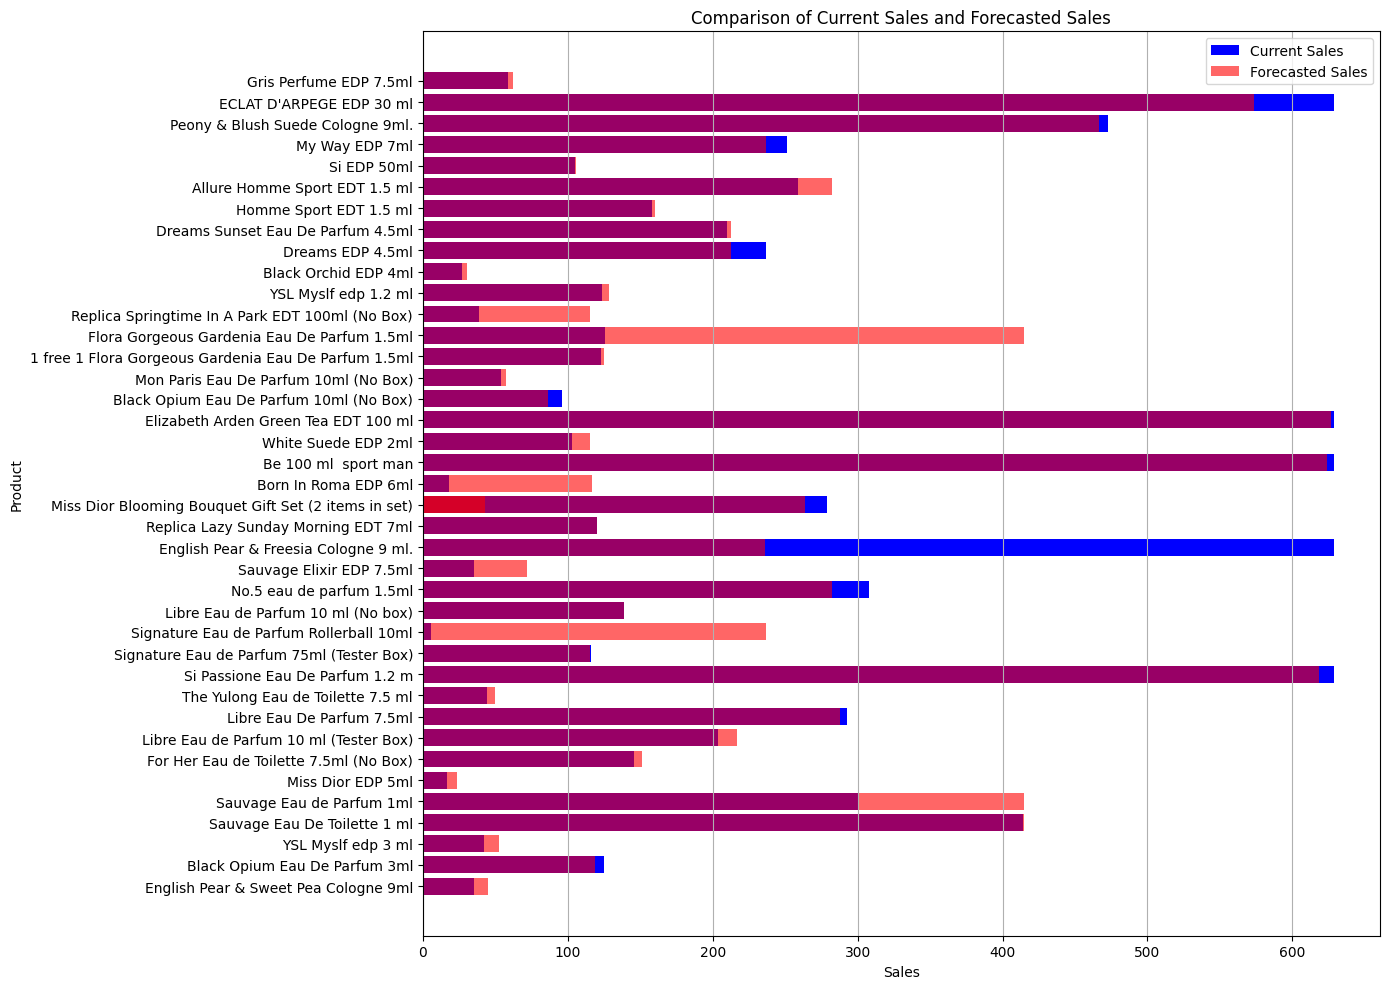

In [194]:
# วิชวลไลซ์ผลลัพธ์เป็นกราฟแท่งแบบแนวนอน
plt.figure(figsize=(14, 10))

# กราฟแท่งสำหรับยอดขายปัจจุบัน
plt.barh(results['Product_names'], results['Current_Sold_out'], color='blue', label='Current Sales')

# กราฟแท่งสำหรับยอดขายที่พยากรณ์
plt.barh(results['Product_names'], results['Forecasted_Sold_out'], color='red', alpha=0.6, label='Forecasted Sales')

plt.xlabel('Sales')
plt.ylabel('Product')
plt.title('Comparison of Current Sales and Forecasted Sales')
plt.legend()
plt.grid(axis='x')

plt.tight_layout()
plt.show()

In [189]:
# ใช้ pickle เพื่อบันทึกผลลัพธ์
import pickle

# Save the results and model
with open('results.pkl', 'wb') as file:
    pickle.dump(results, file)

with open('modelanalysis.pkl', 'wb') as file:
    pickle.dump(model, file)